# Task 4
_Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands._

## Dataset Overview
This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

## Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

## Reading the Dataset

In [2]:
file_path = r'D:\MBA-MMS\Internships\Prodigy InfoTech\Task 4\twitter_training.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [3]:
# Rename columns for easier access
df.columns = ['id', 'entity', 'sentiment', 'content']

# Drop unnecessary columns
df = df[['entity', 'sentiment', 'content']]

# Handle missing or non-string values in the 'content' column
df['content'] = df['content'].astype(str).fillna('')

# Analyze sentiment using TextBlob
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['content'].apply(get_polarity)

# Function to categorize polarity
def get_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['analyzed_sentiment'] = df['polarity'].apply(get_sentiment)



## Sentiment Visualization

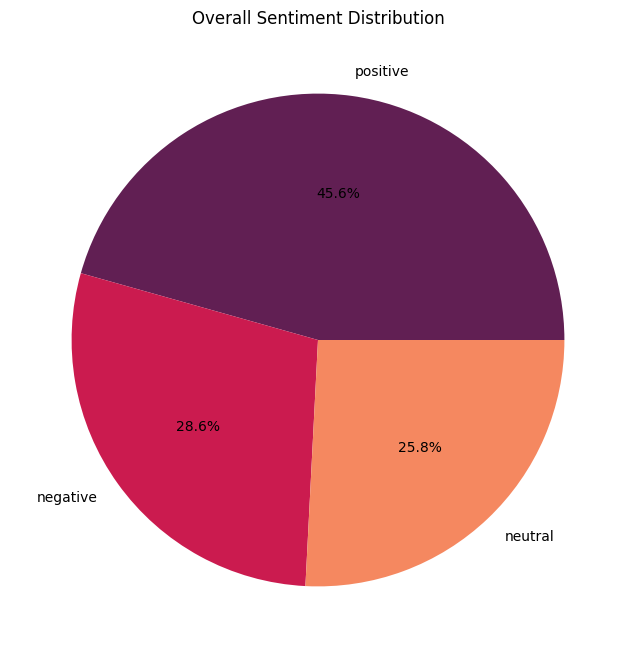

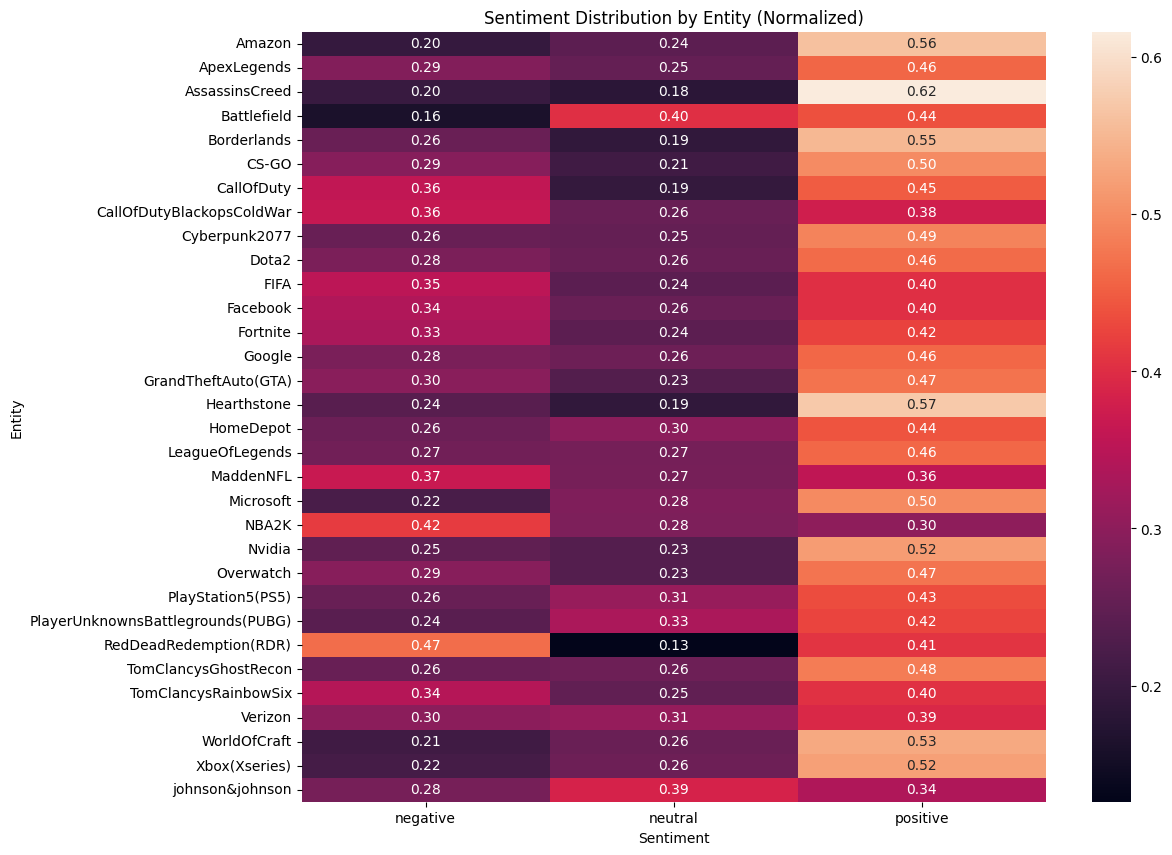

In [4]:
# Overall sentiment distribution
plt.figure(figsize=(8, 8))
df['analyzed_sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('rocket', 3))
plt.title('Overall Sentiment Distribution')
plt.ylabel('')
plt.show()

# Create a pivot table for the heatmap
pivot_table = df.pivot_table(index='entity', columns='analyzed_sentiment', aggfunc='size', fill_value=0)

# Normalize the data for better visual representation
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, cmap='rocket', fmt='.2f')
plt.title('Sentiment Distribution by Entity (Normalized)')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.show()